## PROJECT NAME- Loan_Approval_Prediction

#### Analyzing Loan Eligibility Based on Applicant Characteristics

##### Executive Summary:
This case study explores key factors affecting loan eligibility, focusing on features like education level, self-employment status, annual income, and credit history (CIBIL score). By analyzing these features and building a predictive model, the study aims to help financial institutions better assess loan applications. Using logistic regression,random forest, and SVC the analysis identifies critical factors that influence loan approval.

##### Introduction/Background: 
Financial institutions often evaluate various factors, such as education, income, employment type, and assets, when determining whether to approve or reject loan applications. This case study will analyze a dataset from a financial institution to determine the key factors influencing loan eligibility. Our goal is to create a predictive model to automate loan approval based on applicant characteristics.

##### Objective: 
To identify factors that predict loan eligibility and build a machine learning model to streamline the loan approval process.

##### Dataset Source:
The dataset contains information on loan applicants, including variables like education, income, employment status, credit score, and various asset values.

##### Hypotheses:
Applicants with higher income and education levels are more likely to be approved for loans. Self-employed applicants may face more scrutiny and have lower approval rates. A higher credit score (CIBIL score) will strongly predict loan approval. Assets like residential, commercial, and luxury assets may play a role in loan eligibility. 

##### Steps:
1. Importing libraries
2. load the Data
3. Description of Data
4. Cleaning the Data
5. Data visualisation
6. Predictive Analysis

### Loading Libraries

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

###  Loading the data

In [302]:
# Reading the data
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### EXPLORATORY DATA ANALYSIS

In [303]:
# information about dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [304]:
# Getting statistical summary of  dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [305]:
# counting the number of null values in the dataset.
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [306]:
# Checking for duplicate rows in dataset
df.duplicated().sum()

0

In [307]:

df = df.drop(columns=['loan_id'])
df.head()                                 

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [308]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("numerical_cols :",numerical_cols )

# Check for negative values in numerical columns
negative_values = df[numerical_cols].lt(0).any()
print("Columns with negative values:",negative_values)

# Display columns with negative values
negative_columns = negative_values[negative_values].index
print("Columns with negative values:", negative_columns.tolist())


numerical_cols : Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')
Columns with negative values:  no_of_dependents            False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value     True
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
dtype: bool
Columns with negative values: [' residential_assets_value']


In [309]:
#Strip any extra spaces from column names
df.columns = df.columns.str.strip()

In [310]:
negative_values = df[df['residential_assets_value'] < 0]
negative_values['residential_assets_value']

59     -100000
196    -100000
559    -100000
702    -100000
737    -100000
784    -100000
904    -100000
1089   -100000
1163   -100000
1350   -100000
1392   -100000
1773   -100000
1806   -100000
1866   -100000
1933   -100000
1950   -100000
2707   -100000
3019   -100000
3164   -100000
3180   -100000
3431   -100000
3730   -100000
3747   -100000
3962   -100000
4076   -100000
4130   -100000
4206   -100000
4243   -100000
Name: residential_assets_value, dtype: int64

### DATA VISUALISATION

#### Visualising Education Distribution Of Loan Applicants

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


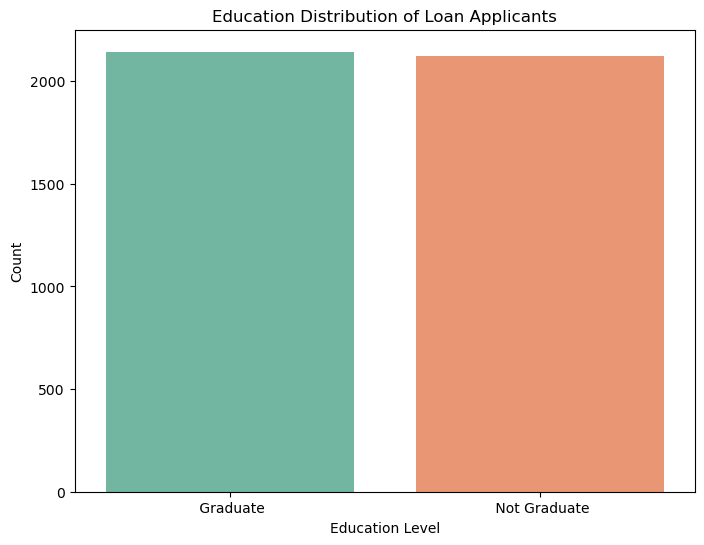

In [311]:
# Verify if 'education' exists in the columns
print(df.columns)

# Check if the column exists and plot the distribution
if 'education' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='education', data=df, palette='Set2')
    plt.title('Education Distribution of Loan Applicants')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'education' column was not found in the dataset.")

#### Visualising Loan Approval Based On Self-Employment Status

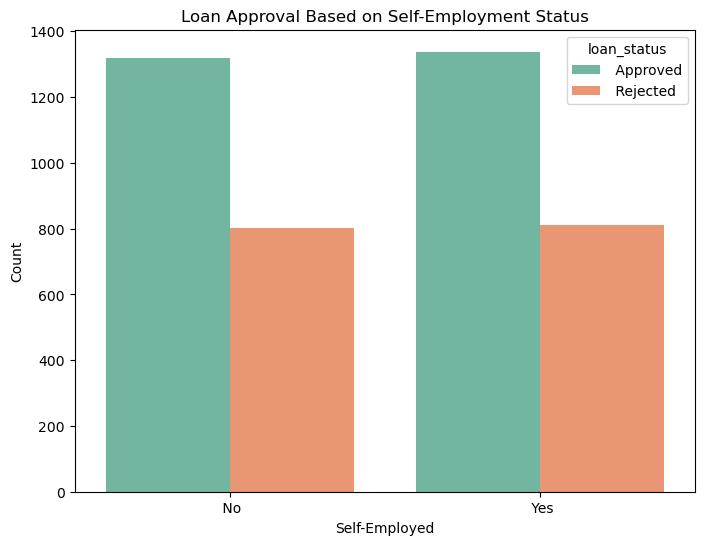

In [312]:
# Plot self-employment status vs. loan approval
plt.figure(figsize=(8,6))
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='Set2')
plt.title('Loan Approval Based on Self-Employment Status')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

### Histogram 

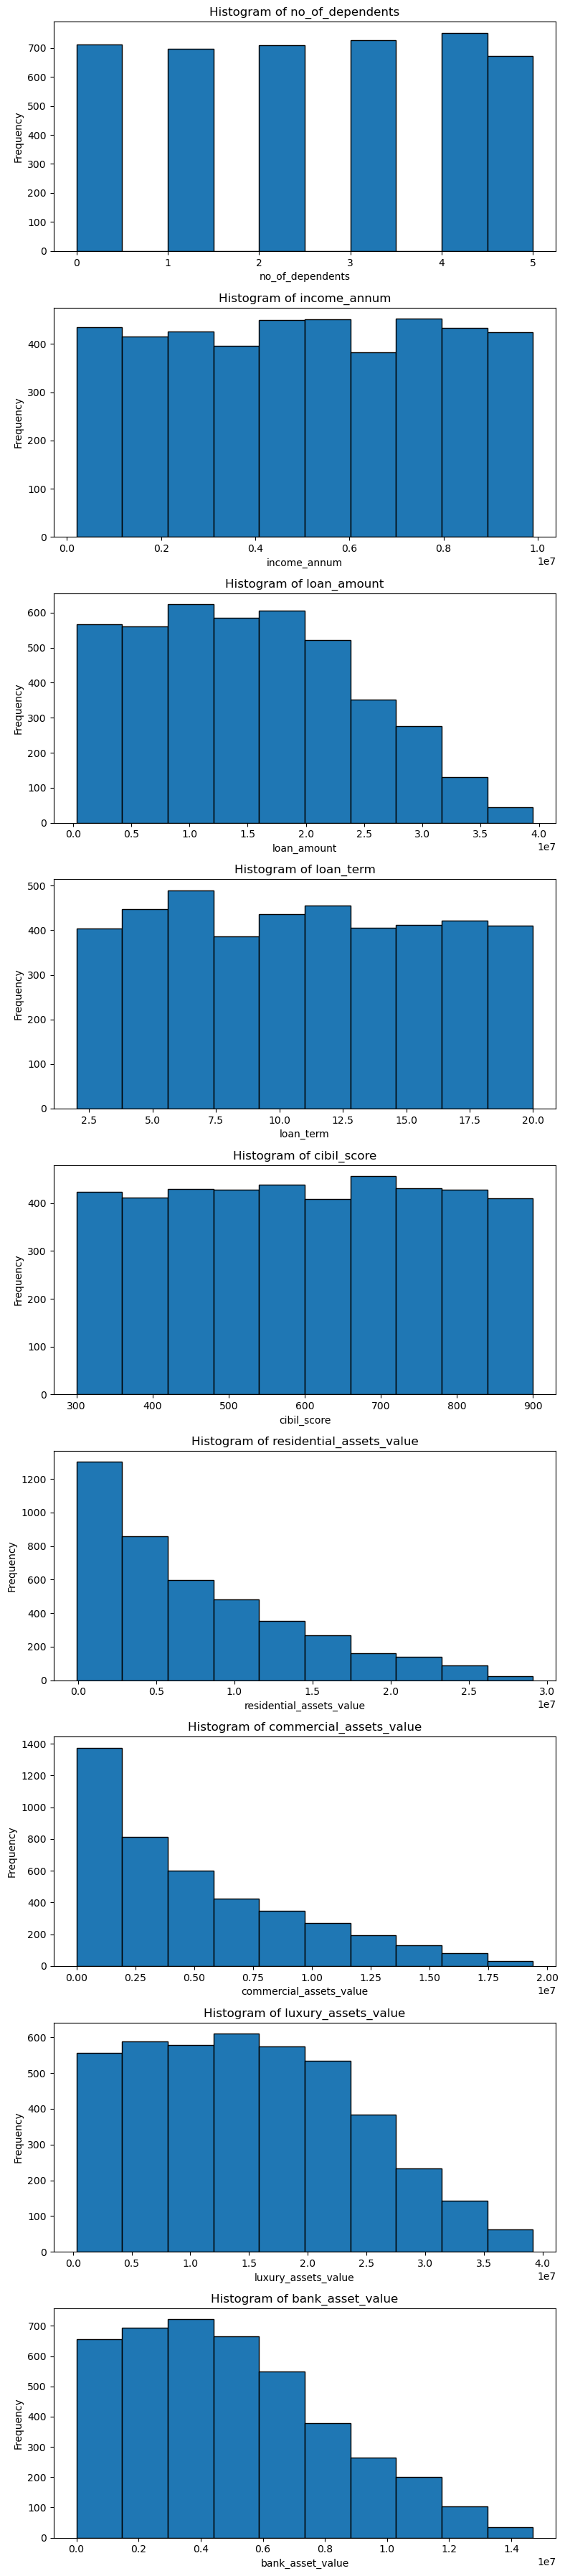

In [313]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, len(numerical_cols) * 4))

# Flatten axes if there's only one subplot
if len(numerical_cols) == 1:
    axes = [axes]

# Plot histograms
for ax, col in zip(axes, numerical_cols):
    ax.hist(df[col], bins=10, edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


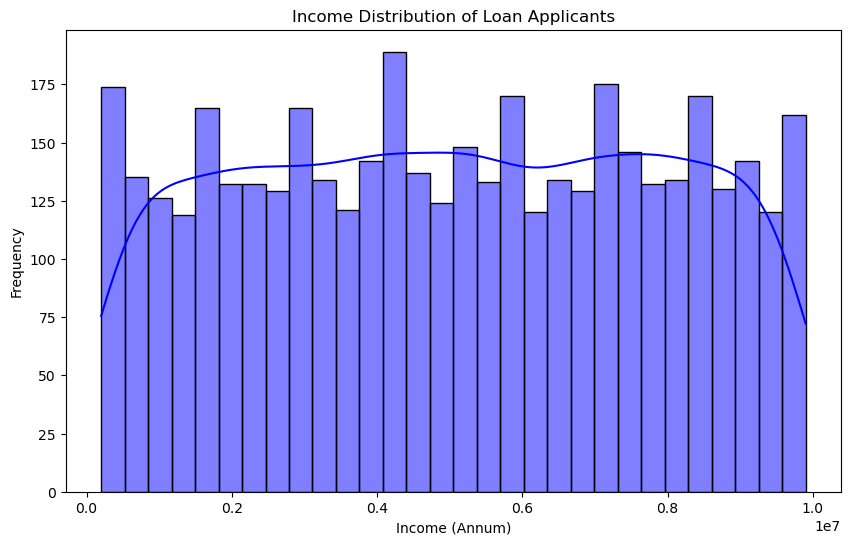

In [319]:
# Plot income distribution
plt.figure(figsize=(10,6))
sns.histplot(df['income_annum'], bins=30, kde=True, color='blue')
plt.title('Income Distribution of Loan Applicants')
plt.xlabel('Income (Annum)')
plt.ylabel('Frequency')
plt.show()

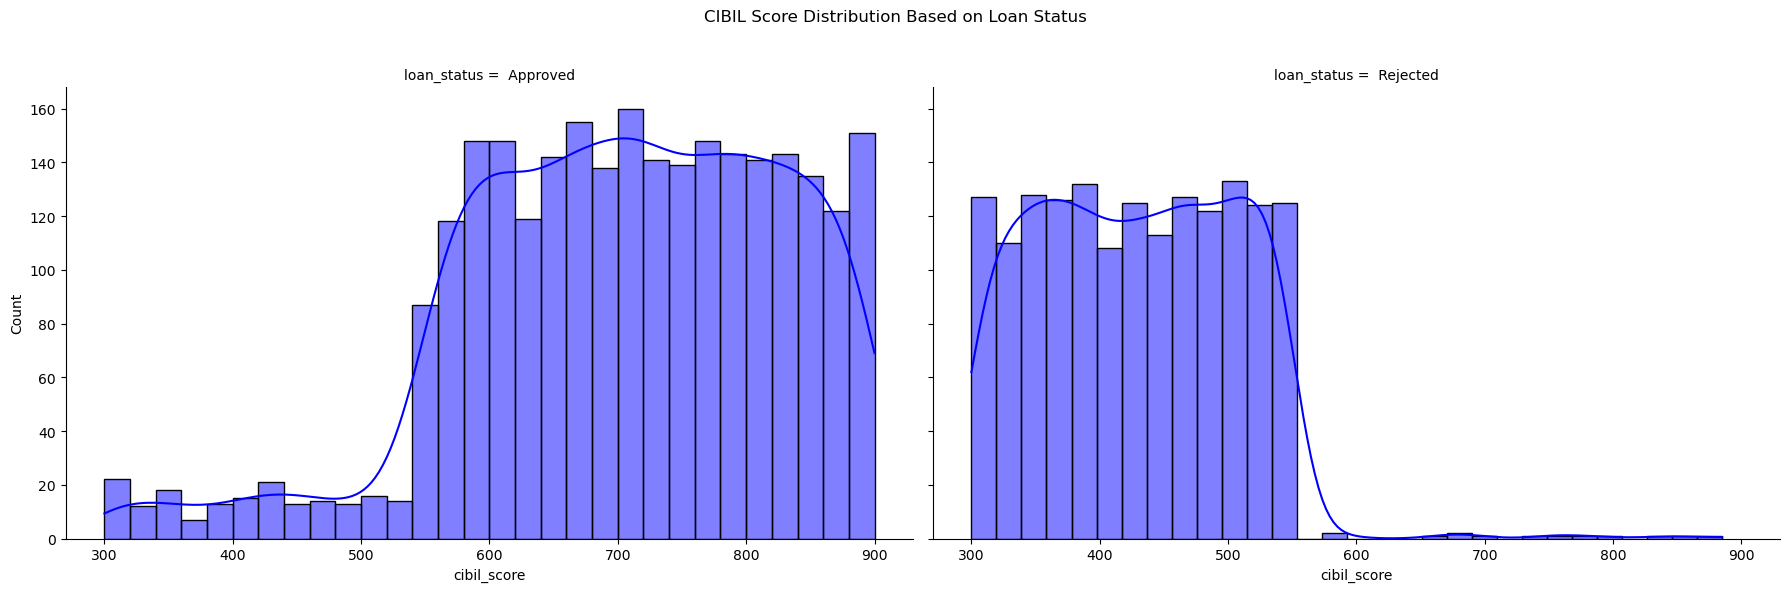

In [320]:
# Create a FacetGrid to separate the data by 'loan_status'
g = sns.FacetGrid(df, col='loan_status', height=6, aspect=1.5)
g.map(sns.histplot, 'cibil_score', bins=30, kde=True, color='blue')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('CIBIL Score Distribution Based on Loan Status')
plt.show()

### Boxplot

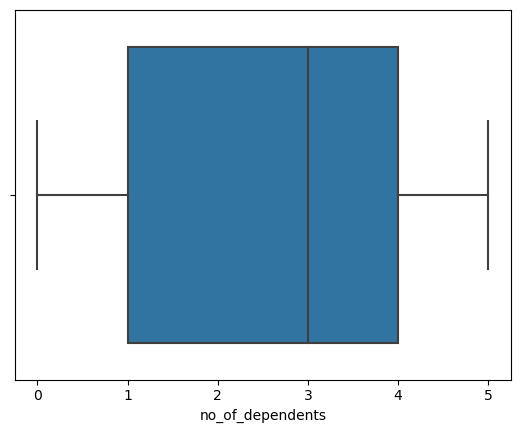

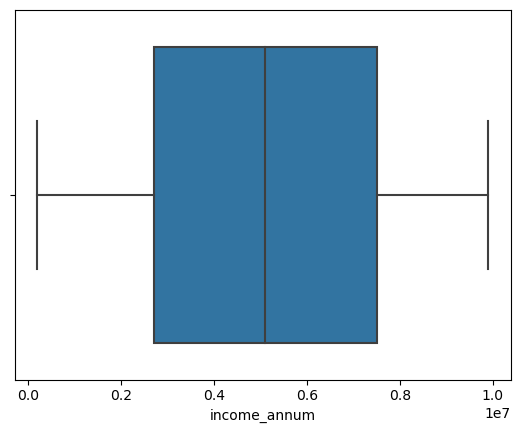

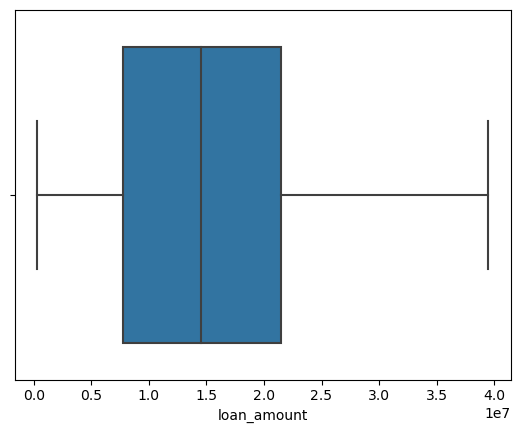

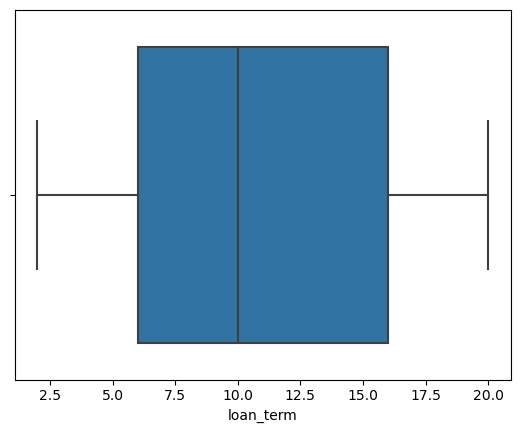

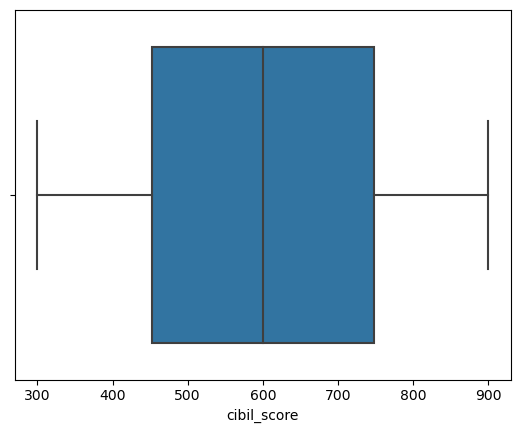

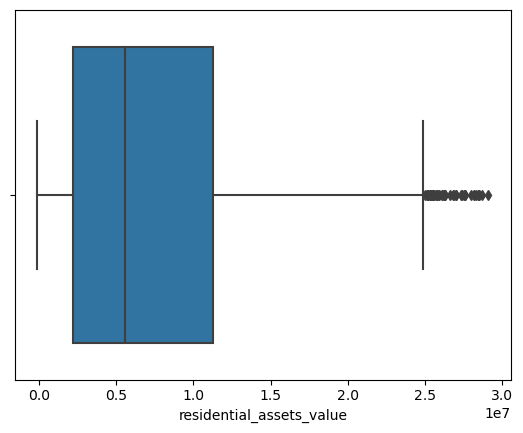

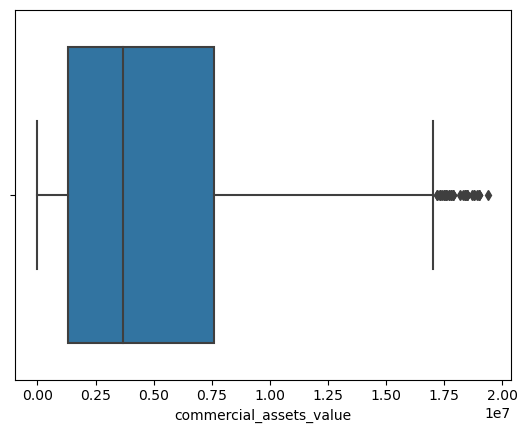

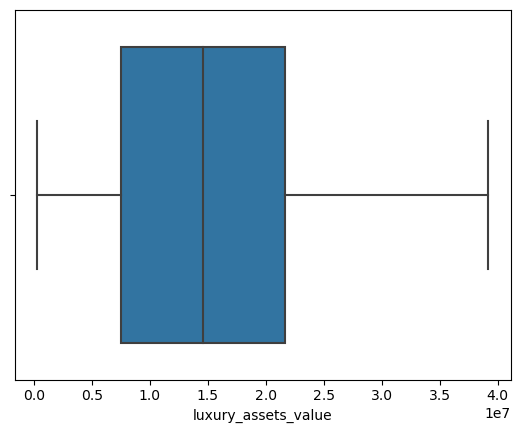

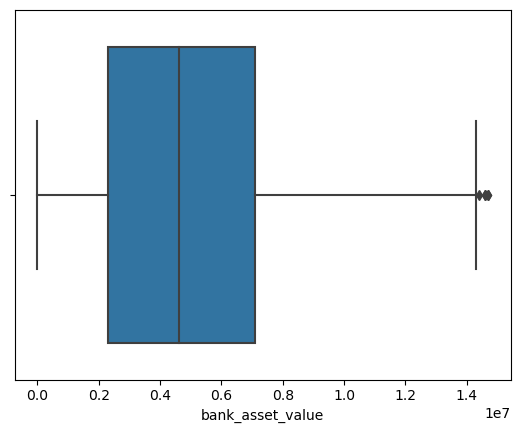

In [314]:
# Boxplot to identifier
for i in df.select_dtypes(include=['number']).columns:
    sns.boxplot(data=df, x=i)
    plt.show()

### Correlation heatmap

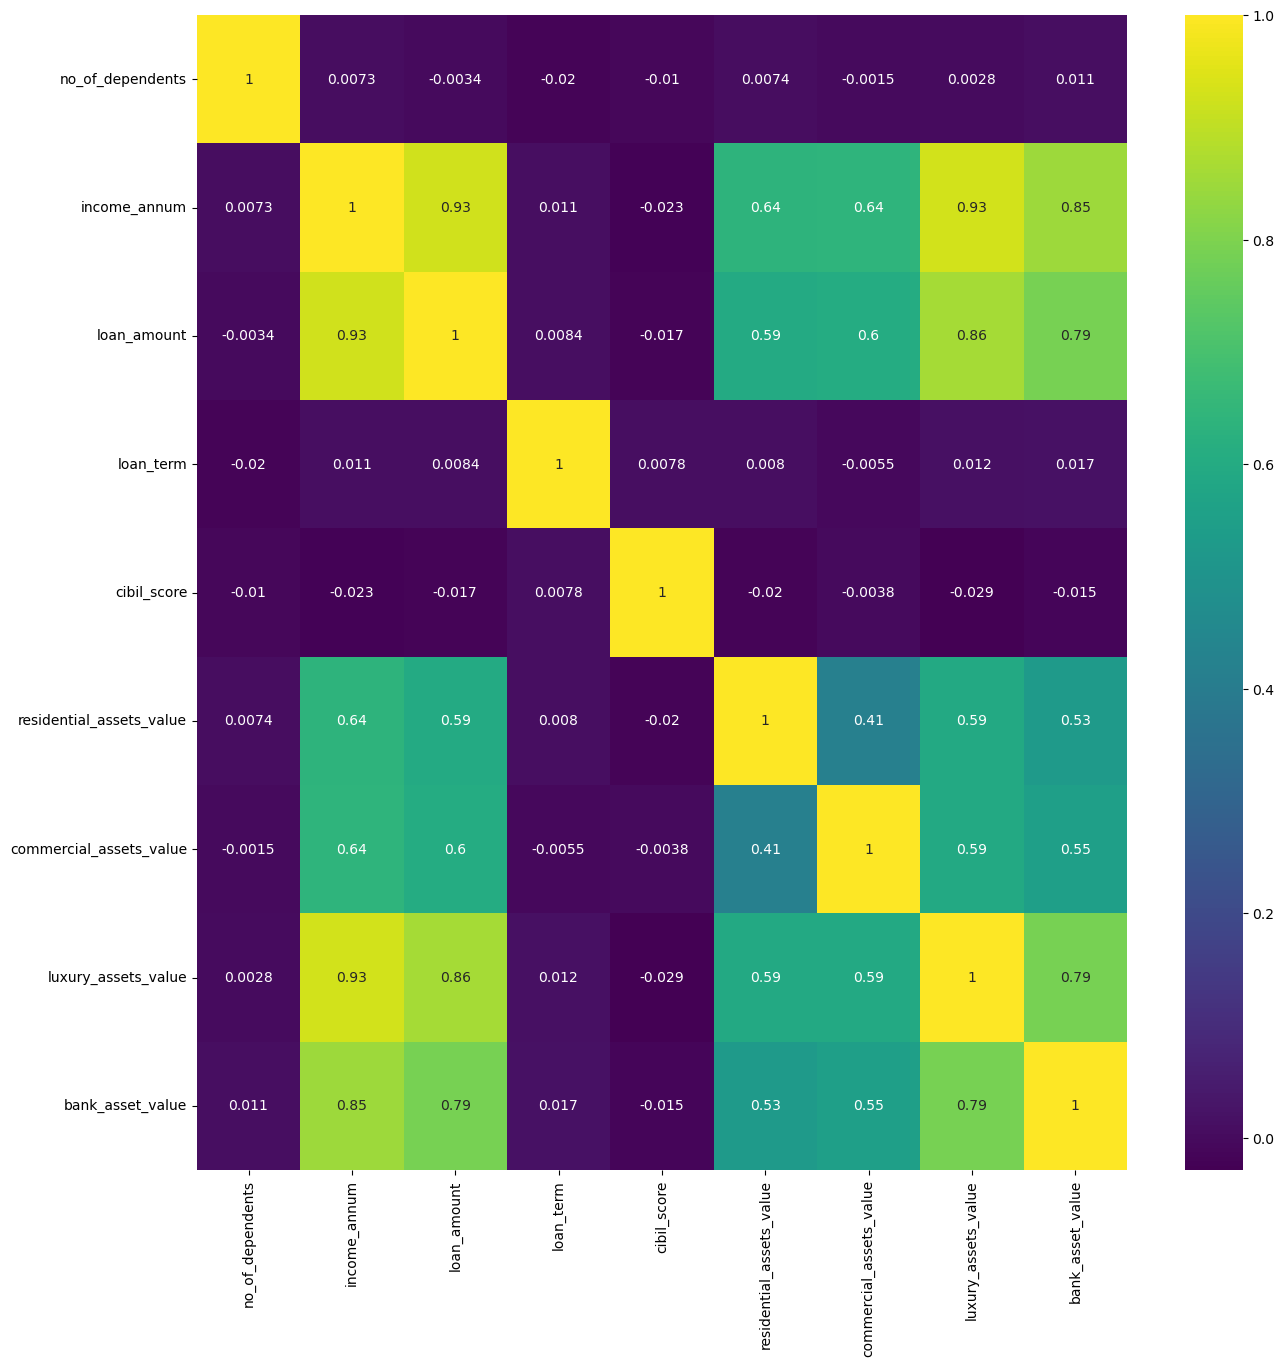

In [315]:
# Correlation with heatmap to interpret the relation and multicolliniarity
df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='viridis', annot=True)
plt.show()

### Scatterplot

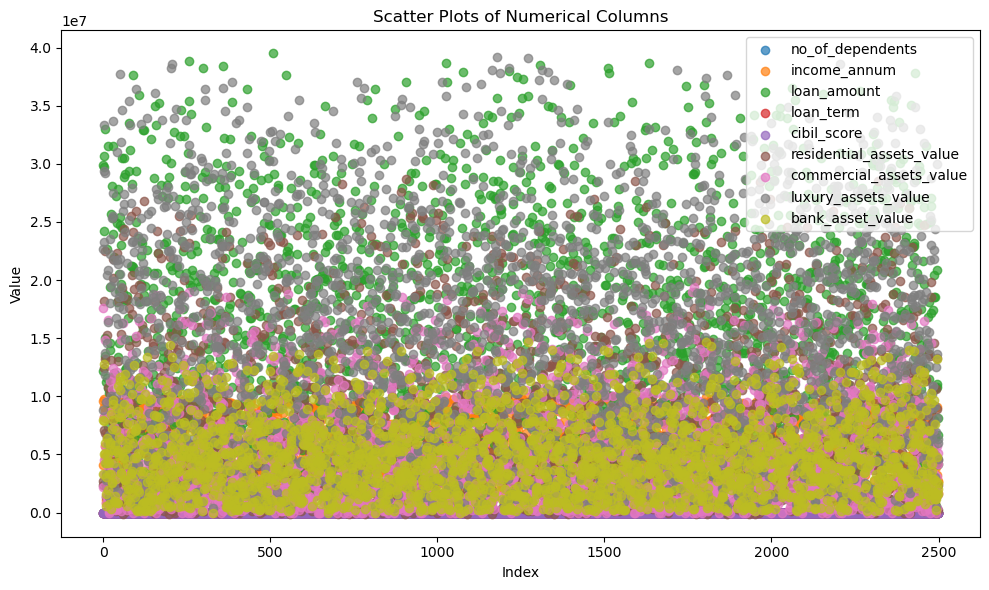

In [316]:
# Select only the first 50 rows
df_limited = df.head(2500)

# Identify numerical columns
numerical_cols = df_limited.select_dtypes(include=['number']).columns

# Create a figure
plt.figure(figsize=(10, 6))

# Plot scatter plots for each numerical column on the same plot
for col in numerical_cols:
    plt.scatter(df_limited.index, df_limited[col], alpha=0.7, label=col)  # Plot column values against index

# Add titles and labels
plt.title('Scatter Plots of Numerical Columns')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()  # Add a legend to differentiate the columns
plt.tight_layout()
plt.show()

In [322]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['education', 'self_employed', 'loan_status'], dtype='object')


In [323]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['education', 'self_employed', 'loan_status']

In [324]:
print(df.columns)


Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


### Splitting and training the model

In [325]:
# Preprocessing the dataset
# Encode categorical variables: 'education', 'self_employed', and 'loan_status'
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])  # Approved=1, Rejected=0

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3415, 11), (854, 11), (3415,), (854,))

In [327]:
# model prediction
# Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_train)
print(y_test)
model.score(X_test,y_test)

1703    1
1173    0
308     1
1322    0
3271    0
       ..
912     0
443     0
1483    0
668     1
1114    1
Name: loan_status, Length: 854, dtype: int32


0.6288056206088993

In [329]:
print("Training features:", X_train.columns.tolist())
print("Testing features:", X_test.columns.tolist())


Training features: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Testing features: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [290]:
# Align the features in the test set with those in the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


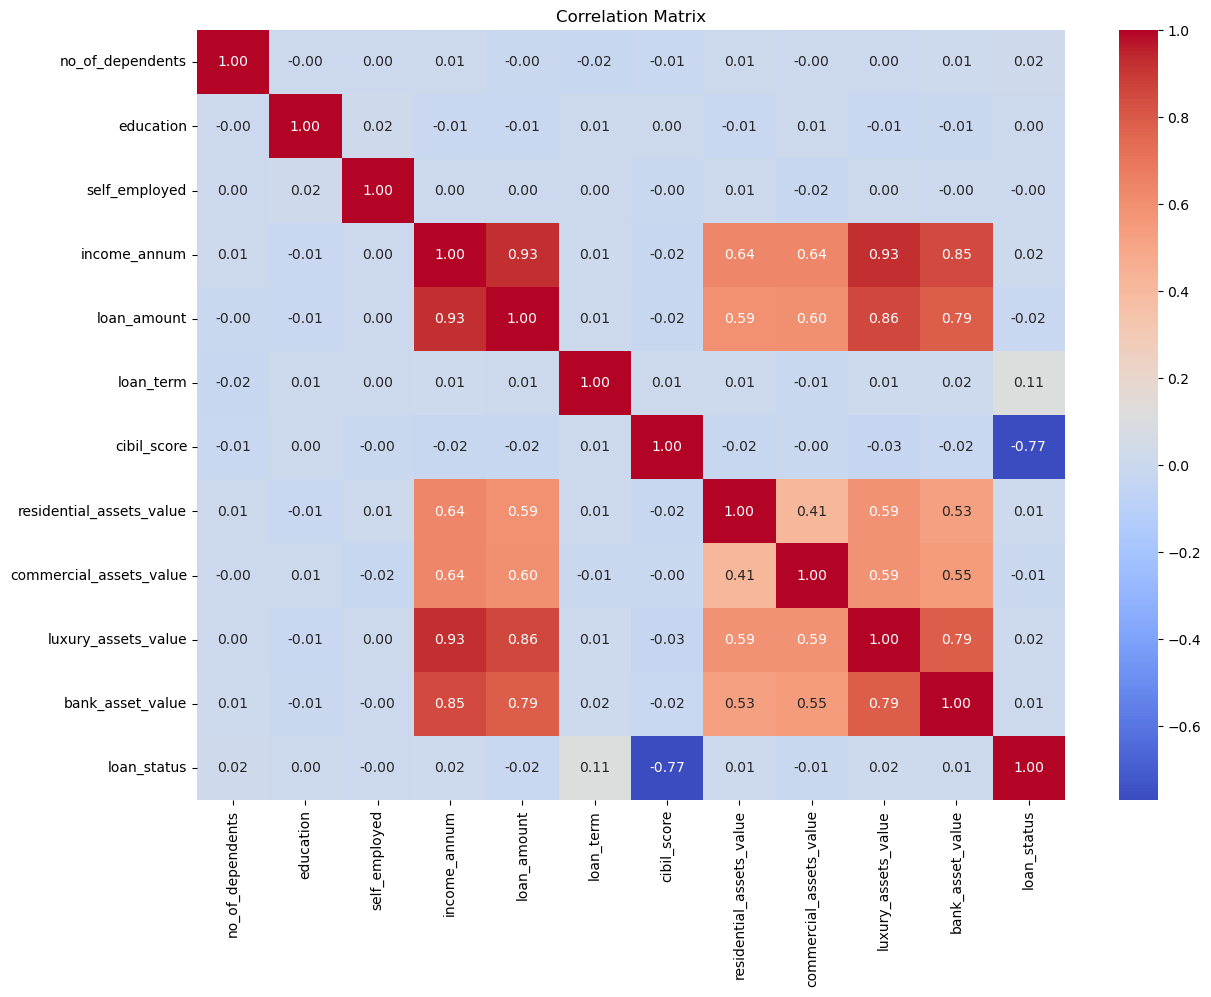

Selected features based on correlation analysis: ['loan_status', 'loan_term', 'cibil_score']


In [294]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify features with high correlation to the target variable
target_corr = correlation_matrix['loan_status'].sort_values(ascending=False)

# Select features with correlation above a certain threshold (e.g., 0.1)
selected_features_corr = target_corr[target_corr.abs() > 0.1].index.tolist()

print("Selected features based on correlation analysis:", selected_features_corr)


In [332]:
# Cross Validation
from sklearn.model_selection import cross_val_score
l_scores=cross_val_score(LogisticRegression(),X=X,y=y)
svc_scores=cross_val_score(SVC(),X=X,y=y)
rf_scores=cross_val_score(RandomForestClassifier(),X=X,y=y)
print(l_scores)
print(svc_scores)
print(rf_scores)
mean_l_scores=np.mean(l_scores)
print("mean_l_scores is",mean_l_scores)
mean_svc_scores=np.mean(svc_scores)
print("mean_svc_scores is",mean_svc_scores)
mean_rf_scores=np.mean(rf_scores)
print("mean_rf_scores is",mean_rf_scores)

[0.62295082 0.62177986 0.62295082 0.62177986 0.62250879]
[0.62295082 0.62177986 0.62177986 0.62177986 0.62250879]
[0.9824356  0.98009368 0.98594848 0.9824356  0.985932  ]
mean_l_scores is 0.6223940301621773
mean_svc_scores is 0.6221598381247067
mean_rf_scores is 0.9833690707270936


In [299]:
# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7) 
svc = SVC() 
lc = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence if needed

# List of classifiers
classifiers = [rfc, knn, svc, lc]

# Fit and predict for each classifier
for clf in classifiers: 
    clf.fit(X_train, y_train)  # Make sure Y_train is y_train in your context
    y_pred = clf.predict(X_train) 
    accuracy = metrics.accuracy_score(y_train, y_pred)
    print(f"Accuracy score of {clf.__class__.__name__} = {100 * accuracy:.2f}%")


Accuracy score of RandomForestClassifier = 99.82%
Accuracy score of KNeighborsClassifier = 77.60%
Accuracy score of SVC = 62.08%
Accuracy score of LogisticRegression = 62.08%


#### Findings: 
From the models, we found several key factors that influence loan eligibility: Credit Score (CIBIL): A higher CIBIL score strongly predicts loan approval. Self-Employment: Self-employed applicants have a lower likelihood of loan approval compared to salaried applicants. Income: Higher income levels also correlate positively with loan approval. Education: Applicants with higher education levels are more likely to have their loans approved. Both the logistic regression and SVC provided accuracy scores of around 62%,KNeighborsClassifier provides accuracy around 77% and RandomForestClassifier performing better with accuracy around 99%.

#### Limitations: 
Imbalanced Data: The dataset has more approved loans than rejected ones, which may affect the model's generalizability. Missing Variables: More detailed financial information (e.g., existing liabilities, savings) could improve the model's predictions.

#### Conclusion:
The study demonstrates that factors such as credit score, income, and education play a critical role in determining loan eligibility. Self-employed applicants face more challenges in loan approval, potentially due to perceived financial instability. Financial institutions can use these insights to enhance their loan approval processes and reduce processing time by automating loan eligibility assessments.